# 웹크롤링

### Requests를 사용한 HTTP 통신
* sever: 서비스를 제공하는 측 ex) 구글, 페이스북 등
* client: 서비스를 제공받는 측 ex) 일반 사용자
* web browser: 웹서비스 이용을 위해 사용하는 프로그램 -> 서버와 클라이언트 간의 네트워크 형성
* HTTP: 통신에 대한 약속 cf. 통신: 클라이언트의 요청 -> 서버의 응답
* requests: 파이썬의 가장 베이직한 HTTP 호출 프로그램
* requests.get(): 서버에서 자원을 가져올 때 보내는 요청
* request.post(): 서버로 자원을 보낼 때 보내는 요청으로 거의 사용되지 않음 

In [3]:
import lxml.html # html을 처리하기 위해 import
import requests # http토신을 위한 request import

In [4]:
# 네이버 검색창에 '비타민'을 검색한 결과 웹페이지
url = 'https://search.naver.com/search.naver?where=nexearch&sm=top_hty&fbm=1&ie=utf8&query=%EB%B9%84%ED%83%80%EB%AF%BC'

In [7]:
# get: 서버에서 자원(텍스트, 이미지, 압축파일 등)을 가져올 때 보내는 요청
res = requests.get(url) 

### URL의 구조
* URL = Scheme + host + path + query
* Scheme(통신방식): http:// or https://(보완 강화)
* Host(서버): 현재 서버의 주소
* Path(서버자원위치): 서버도 컴퓨터 폴더와 파일의 관계로 경로 생성
* Query(추가정보): '?'뒤에 나오는 부분으로 추가 정보를 전달할 때 사용

### HTTP 상태코드와 header
* HTTP 상태코드: HTTP 상태를 확인하기 위한 세 자리 수 값
* 2xx: success -> 200ok
* 3xx: redirection -> https://ko.wikipedia.org/wiki/URL_%EB%A6%AC%EB%8B%A4%EC%9D%B4%EB%A0%89%EC%85%98
* 4xx: client error -> 주목
* 5xx: server error -> 주목
* HTTP header: 웹브라우저가 웹페이지에 접속할 때 서버 측에 전달해주는 클라이언트의 정보
* Referer: 어떤 페이지를 거쳐 방문했는가
* User-Agent: 서버에 접속하는 클라이언트가 누구인가

In [8]:
import requests
res = requests.get('https://www.onoffmix.com/')
res # 500 -> server error

<Response [500]>

In [10]:
# 크롬 usesr agent를 함께 보내주어 크롬으로 접속하는 척 접근
user_agent = "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36"

In [11]:
# 200 -> ok
requests.get('https://www.onoffmix.com/', headers={'User-Agent': user_agent})

<Response [200]>

### HTML 구성체계
* HTML: 서버가 클라이언트에게 응답하는 방법 중 하나 ex) 그 외 pdf, img 등이 있음
* HTML의 구조: HTML = head(title) + body(p/table/image)
* 태그(tag): <여는 태그> 요소 </닫는 태그>
* 요소(element): 태그로 감싸진 하나의 영역으로 요소 안에 또다른 요소 포함 가능
* 속성(attribute): 태그 안에 부가적인 정보 표시

### 웹크롤링과 웹스크래핑
* 웹스크래핑: HTML구조를 처리해서 하이퍼텍스트 혹은 정보를 추출
* 웹크롤링: 이를 여러 웹페이지를 넘어가면서 실행

1) 서버의 자원을 받아옴 by get()

2) 받아온 정보 추출

3) HTML 요소 선택 by CSS selector

4) 추출한 정보를 DB를 만드는 등 활용

### Requests 사용 시 기본적인 처리 작업
* css선택자를 사용하기 위해서 별도 설치 필요

In [ ]:
import lxml.html # html을 처리하기 위해 import
import requests # http토신을 위한 request import

In [12]:
# !pip install cssselect

In [13]:
url = "https://search.naver.com/search.naver?where=nexearch&sm=top_hty&fbm=1&ie=utf8&query=%EB%B9%84%ED%83%80%EB%AF%BC"

In [14]:
# res: 서버에게 받은 웹페이지 자원들에 대한 응답이 들어있음
res = requests.get(url)
res.status_code # 200 -> ok

200

'<!doctype html> <html lang="ko"> <head> <meta charset="utf-8"> <meta name="referrer" content="always">  <meta name="format-detection" content="telephone=no,address=no,email=no"> <meta name="viewport" content="width=device-width,initial-scale=1.0,maximum-scale=2.0"> <meta property="og:title" content="비타민 : 네이버 통합검색"/> <meta property="og:image" content="https://ssl.pstatic.net/sstatic/search/common/og_v3.png"> <meta property="og:description" content="\'비타민\'의 네이버 통합검색 결과입니다."> <meta name="description" lang="ko" content="\'비타민\'의 네이버 통합검색 결과입니다."> <title>비타민 : 네이버 통합검색</title> <link rel="shortcut icon" href="https://ssl.pstatic.net/sstatic/search/favicon/favicon_191118_pc.ico">  <link rel="search" type="application/opensearchdescription+xml" href="https://ssl.pstatic.net/sstatic/search/opensearch-description.https.xml" title="Naver" /><link rel="stylesheet" type="text/css" href="https://ssl.pstatic.net/sstatic/search/pc/css/search1_210701a.css"> <link rel="stylesheet" type="text/css" hre
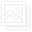
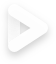
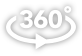
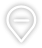
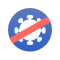
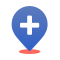
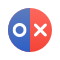
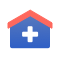

In [15]:
# res.text: 이 응답에서 우리가 원하는 html이 저장된 위치로 접근
res.text

In [16]:
# lxml.html.fromstring: 접근한 html을 우리가 원하는 부분을 쉽게 추출할 수 있는 형태(str)로 바꿔줌
root = lxml.html.fromstring(res.text)
root

<Element html at 0x2024249fdb0>

### CSS selector

* 태그명: cssselect('태그명')
* 해당 태그명을 가진 모든 요소 추출

In [19]:
titles = root.cssselect('title')
titles

[<Element title at 0x20243c5f310>]

In [20]:
for i in titles:
    print(i.text)

비타민 : 네이버 통합검색


* 클래스: cssselect('.클래스') / cssselect('.클래스1.클래스2')
* 동일한 태그명을 가지고 있으나 유형이 다른 경우 이를 구별하기 위한 속성

In [21]:
# 하나의 클래스
etc = root.cssselect('.etc_txt')
etc

[<Element span at 0x202424b8770>]

In [22]:
etc[0].text

'다른 사이트를 보시려면 클릭하세요'

In [25]:
# 여러 개의 클래스
product_info = root.cssselect('.title.elss')
product_info

[<Element a at 0x2023e1ad1d0>, <Element a at 0x202424b81d0>]

In [26]:
for i in product_info:
    print(i.text)

비타민하우스 파이토 멀티비타민 포 우먼 맨 2병 4개월분 선물세트 종합 영양제 남성 여성
(비건인증) 헬스원 비건바이타민, 한포 비타민


* 태그와 글래스: cssselect('태그명.클래스')

In [27]:
product_info = root.cssselect('a.title')
product_info

[<Element a at 0x2023e1ad1d0>,
 <Element a at 0x202424b81d0>,
 <Element a at 0x2023e1ad590>,
 <Element a at 0x202421f54f0>,
 <Element a at 0x202421f59a0>,
 <Element a at 0x202421f5b80>,
 <Element a at 0x202421f5cc0>,
 <Element a at 0x202421f57c0>,
 <Element a at 0x202421f5e00>,
 <Element a at 0x202421f5950>,
 <Element a at 0x202421f5e50>,
 <Element a at 0x202421f5720>,
 <Element a at 0x202421f5270>,
 <Element a at 0x202421f59f0>,
 <Element a at 0x202421f5900>,
 <Element a at 0x202421f5450>]

In [30]:
for i in product_info:
    print(i.text)

비타민하우스 파이토 멀티비타민 포 우먼 맨 2병 4개월분 선물세트 종합 영양제 남성 여성
(비건인증) 헬스원 비건바이타민, 한포 비타민
얼라이브 원스데일리 멀티비타민 1745mg x 100정
팜엔탑 멀티비타민 미네랄 500mg x 180정
센트룸 포 우먼 멀티 비타민 미네랄 1418mg x 112정
포뉴 멀티비타민미네랄 600mg x 180정
센트룸 포맨 멀티 비타민 미네랄 1387mg x 112정
하루약속 멀티비타민 94.5g x 30포
멀티비타민 종합비타민 앤 미네랄 3박스 9개월분 GNM자연의품격 성인 어린이 비타민
뉴트리코어 멀티비타민 성인 남성 여성 어린이 NCS
함소아 비타민젤리 60정 3종세트 (딸기맛, 포도맛, 감귤맛 각1)
함소아 면역비타민 브이업 + 프로폴리스 50ml X 2개
함소아 하루비타민 X 2개 + 프로폴리스 50ml
함소아 하마비타민 영양가득 키즈 (120정 X 1개 /30일분)
함소아 비타민젤리 100정 3종세트 (딸기맛, 포도맛, 감귤맛 각1)
뉴트리코어 키즈 멀티비타민 아이 유아 키즈 (맛있는 분유맛)


* 포함관계: cssselect('.상위요소클래스 .하위요소클래스')
* 포함관계는 띄어쓰기로 나타냄. 나머지는 동일

In [35]:
price = root.cssselect('.price strong')
price

[<Element strong at 0x2024249f4f0>,
 <Element strong at 0x202421f50e0>,
 <Element strong at 0x202424b8590>,
 <Element strong at 0x202421f1c20>,
 <Element strong at 0x202421f1180>,
 <Element strong at 0x202421f1040>,
 <Element strong at 0x202421f1630>,
 <Element strong at 0x202421f1ea0>,
 <Element strong at 0x202436f2090>,
 <Element strong at 0x202436f2040>,
 <Element strong at 0x202436f20e0>,
 <Element strong at 0x202436f2130>,
 <Element strong at 0x202436f2180>,
 <Element strong at 0x202436f21d0>,
 <Element strong at 0x202436f2220>,
 <Element strong at 0x202436f2310>]

In [37]:
for i in price:
    print(i.text)

45,000
18,000
20,170
40,440
35,700
36,000
36,050
92,300
21,900
79,000
100,800
59,640
103,320
27,000
131,400
49,000


* 아이디: cssselect('#아이디')
* 클래스와 유사한 개념으로 같은 클래스를 가지는 요소가 여러 개 존재할 수 있기 때문에 고유한 아이디를 가지는 요소 하나를 추출하고자 할 때 사용
* 원칙적으로 아이디는 유일해야하지만 지켜지지 않는 경우가 많음

In [38]:
h = root.cssselect('#u_skip span')
h

[<Element span at 0x202421f1310>, <Element span at 0x2023e1ad540>]

In [39]:
h[0].text

'메뉴 영역으로 바로가기'

* 수집한 정보를 데이터프레임으로 저장하기

In [40]:
data1 = []; data2 = []

for i in product_info:
    data1.append(i.text)
for j in price:
    data2.append(j.text)

In [42]:
import pandas as pd
df = pd.DataFrame({'product': data1,
                  'price': data2})
df

,product,price
0,비타민하우스 파이토 멀티비타민 포 우먼 맨 2병 4개월분 선물세트 종합 영양제 남성 여성,"45,000"
1,"(비건인증) 헬스원 비건바이타민, 한포 비타민","18,000"
2,얼라이브 원스데일리 멀티비타민 1745mg x 100정,"20,170"
3,팜엔탑 멀티비타민 미네랄 500mg x 180정,"40,440"
4,센트룸 포 우먼 멀티 비타민 미네랄 1418mg x 112정,"35,700"
5,포뉴 멀티비타민미네랄 600mg x 180정,"36,000"
6,센트룸 포맨 멀티 비타민 미네랄 1387mg x 112정,"36,050"
7,하루약속 멀티비타민 94.5g x 30포,"92,300"
8,멀티비타민 종합비타민 앤 미네랄 3박스 9개월분 GNM자연의품격 성인 어린이 비타민,"21,900"
9,뉴트리코어 멀티비타민 성인 남성 여성 어린이 NCS,"79,000"


* 속성: 추출한 요소.attrib['사용하고자 하는 속성명']
* 속성의 클래스나 아이디에 해당되는 요소가 아닌 해당 요소의 속성 내용 자체를 추출하기 위해서는
* 먼저 사용하고자 하는 속성에 해당되는 요소를 추출한 후
* 해당 요소에서 attrib메소드를 이용해 사용하고자 하는 속성에 해당되는 내용 추출

In [44]:
# 속성에 해당되는 요소 추출
links = root.cssselect('.product_info a')

In [ ]:
# 속성에 해당되는 내용 추출
links[0].attrib['href']

In [45]:
urls = []

for link in links:
    print(link.attrib['href'])
    urls.append(link.attrib['href'])

https://adcr.naver.com/adcr?x=fZgT/hDw15y1vIo3qDh9bP///w==kaDk0vfW9gulpBi1PJR5UKfxqgHSNXbxOl2ZGhzasKD1Z9Cw3yXF8YrNtVn/fRIXoBJoLPfoM6o/9d6BpB9KWk0DN/PNlEwoR9T3uO8z7Ulk4joPYx3cm7lGxQDezLYKagBEDER7Grv5ETQH9frGZylBJTyJ6IvSjmLWMp1sKXzWPRifgg3wdMuViyAeT+Aswl6e7v0krO/ojO5yd3N7pWw4uKuqTEgjRkg0S2C3oXxAsAiY52BPruG20zxT8O+WuHwXb8XmVehClGURtku4Sw9LUxL1+9z8vVkHiVH9Htx7YywJT707BECYZcwDS0rrSFsPugviyCjmhpZfVAjcLyvLvSf37GD9ES/fJyw99mfcHBvwKPsiSwz5n6388cTqgbinoXtzmk31vl9mzfHml7W2ncyQbnbcqskDhV/m3pTd9roV3cIs0yleo243lA5aO1B8GD8OGYttF3g8QPTI5vGPDXSh1cPgavR4SPNdUzmK23FBkRkAQUkCHifuJ8WAi2bEPxmBjpfBwsL6dqRS7kWdNS7GDyZf9cabGMb0dCHWtj8OlCDHsMG9IpJwdoAhXdMU4jtw6l8KZaeO76smeF81bLhaDLKQCy8rHIneQvq1YuowGwhy/yXeLdm36Hpl5y6JPyGOZ6H4rV1tz+BMOsoj9CCgXUbZ+0UqcEIsJA0FOqAWYs5ltSnljk8laocdyi14qQufCO45Va4N/s2jHRU6TnI8W39RjI5Zy9kKgmhkOtpm071goD4d+0LGmBbY6/2GA/l6FwV9h0QiZndlOwPm0+ZmOwD3jNvoss/N3ocIuxn8AvPY9vm0o3WRZf9hcMmHycdI772KY+y4qPjan+A==&ui=GUIDE
javascript:;
http://pay.naver.com/about?frm=sec
https://help.pay.naver.com/

* 속성과 웹페이지 내의 다른 웹페이지: 하이퍼텍스트를 이용해 다른 웹페이지로 이동할 수 있는 정보들을 추출하는 방법

In [47]:
# data = []

# for url in urls:
#     res = requests.get(url)
#     root = lxml.html.fromstring(res.text)
#     '''
#     각 웹페이지에서 반복추출하고 싶은 정보
#     여기서는 상품정보 정도를 추출할 수 있겠다.
#     다만, 현재 웹페이지들에는 상품링크뿐만 아닌 다른 것도 포함되어 있으므로
#     웹크롤링을 잘 설계해서 추출해야함을 인지하자.
#     '''

* 다른 웹페이지: 예를 들어 웹툰의 각 화마다 특정 정보를 추출하고 싶을 때

In [54]:
url = "https://comic.naver.com/webtoon/detail.nhn?titleId=570503&no={}"

In [55]:
url.format(4)

'https://comic.naver.com/webtoon/detail.nhn?titleId=570503*no=4'

In [56]:
res = requests.get(url.format(4))
root = lxml.html.fromstring(res.text)

In [59]:
score = root.cssselect('.rating_type4')
score # 정보가 추출되지 않음!!! -> 다른 방법(Selenium) 이용

[]

### 셀레늄(Selenium)

* requests 라이브러리 많으로는 javascript와 같은 프로그램이 돌아가고 있는 경우 등 복잡한 웹페이지 처리 어렵
* 따라서 이런 경우 셀레늄이라는 소프트웨어 이용

* 1. Chrome 웹드라이버 import 및 실행할(제어될) 웹브라우저 객체 생성

In [64]:
from selenium.webdriver import Chrome
browser = Chrome()

* 2. HTTP 통신 자원을 받아오기 by get()

In [66]:
url = "https://comic.naver.com/webtoon/detail.nhn?titleId=570503&no={}"
browser.get(url.format(4))

* 3. 원하는 자원 읽기 by css selector

In [68]:
score = browser.find_elements_by_css_selector('.rating_type4')
score[0].text

'평점\n9.93 (참여 111396)'

In [72]:
# next_ep = browser.find_elements_by_css_selector('.btn_next')
# next_ep[0].click()

### BeautifulSoup
* 굳이 사용하지 않아도 되지만 parser을 통해 html요소에 쉽게 접근할 수 있게 돕는 도구
* parser: html.parser, lxml, html5lib 등
* 간단한 사용법: http://hleecaster.com/python-web-crawling-with-beautifulsoup/

### 예외처리
* try except문 이용
* HTTP 상태코드의 4xx, 5xx에 해당하는 문제가 발생한 경우
* URLerror: 서버가 다운되었거나 서버에 전혀 접속이 안되는 경우
* 다음 웹페이지에서 자동화된 코드에 작성된 태그가 존재하지 않는 경우
* 서버가 자동화된 코드 작동속도에 비해서 응답을 전달하기에 충분한 시간을 가지지 못한 경우

* 간단한 예외처리

In [ ]:
try:
    # 실행할 코드
except:
    # 만약 실행한 코드가 오류나 none을 반환할 경우
    # 처리 코드

In [74]:
try:
    browser.get(url.format(4))
except:
    None

* 타임슬립

In [75]:
from time import sleep
try: 
    browser.find_elements_by_class_name('next')[j].click()
    # 여기서는 오직 클래스만을 선택하기 위한 것을 사용
    # 그냥 이런 것도 있다는 것을 봐두자
    sleep(0.01)
    # 이렇게 랜덤한 타임슬립을 줄 수도 있음
    sleep(random(0.1, 0.9))
except:
    None

# 웹 크롤링 실습1
### 이미지 크롤링: 크롤링한 이미지 주소를 이용해 이미지 다운로드

In [94]:
from selenium.webdriver import Chrome
browser = Chrome()

In [95]:
url = 'https://search.naver.com/search.naver?where=image&sm=tab_jum&query=%EB%B9%84%ED%83%80%EB%AF%BC'
browser.get(url)

In [97]:
# res = browser.find_elements_by_css_selector('img.api_get')[10].get_attribute('src')
# res -> 오류 ㅠㅠ

IndexError: list index out of range

In [77]:
# 현재 경로 확인
import os
print(os.getcwd())

C:\Users\user


In [78]:
# 폴더 생성
img_folder_path = 'C:/Users/user/imgs' # 이미지 저장 폴더

if not os.path.isdir(img_folder_path): # 없으면 새로 생성
    os.mkdir(img_folder_path)

In [98]:
# # 이미지 다운로드
# from urllib.request import urlretrieve

# for index, link in enumerate([res]):
#     start = link.rfind('.') # .를 시작으로
#     end = link.rfind('?') # ?를 끝으로
#     filetype = link[start:end] # 확장자명을 잘라서 filetype 변수에 저장(ex -> .jpg)
#     # link에서 이미지 다운로드 후 './imgs/'에 파일명은 index와 확장자 명으로 
#     # 이렇게 확장자 명을 명시해줘야 permission denied 발생 X
#     urlretrieve(link, './imgs/{}{}'.formatr(index, filetype)) 

# 웹크롤링 실습2
### 웹툰 연애혁명 댓글 웹크롤링 

In [22]:
import pandas as pd
from selenium.webdriver import Chrome
from time import sleep

In [25]:
url_연애혁명= [f'https://comic.naver.com/comment/comment.nhn?titleId=570503&no={i+1}' for i in range(3)]

In [26]:
def webtoon_crawling(urls) :
    browser = Chrome() 
    comments=[]
    for url in urls:
        browser.get(url)
        if url[-1] == '1' :
            browser.find_element_by_class_name('u_cbox_cleanbot_setbutton').click()
            sleep(0.6)
            browser.find_element_by_class_name('u_cbox_layer_cleanbot2_checkbox').click()
            sleep(0.6)
            browser.find_element_by_class_name('u_cbox_layer_cleanbot2_extrabtn').click()
            sleep(0.6)

        browser.find_element_by_class_name('u_cbox_in_view_comment').click()
        sleep(0.6)


        while browser.find_element_by_css_selector('.u_cbox_next.u_cbox_next_end').text == '맨뒤':
        #for j in range(int(last_p)):
            # 마지막 요소뽑은거 텍스트가 last_p보다 작으면 반복 

            sleep(0.01)
            if browser.find_element_by_class_name('u_cbox_next').text =='다음' :
                sleep(0.01)


                for j in range(10):
                    try:
                        browser.find_elements_by_class_name('u_cbox_page')[j].click()
                        sleep(0.01)
                        for i in range(len(browser.find_elements_by_css_selector('.u_cbox_contents'))):
                            sleep(0.01)
                            comment=browser.find_elements_by_css_selector('.u_cbox_contents')[i].text
                            sleep(0.01)
                        #comments.extend(browser.find_elements_by_css_selector('.u_cbox_contents')[i].text)
                        #sleep(0.6)
                            rec=browser.find_elements_by_css_selector('.u_cbox_cnt_recomm')[i].text
                            sleep(0.01)
                            unrec=browser.find_elements_by_css_selector('.u_cbox_cnt_unrecomm')[i].text
                            sleep(0.01)
                            comments.append((comment,rec,unrec))
                    except:
                        continue
                browser.find_element_by_class_name('u_cbox_next').click()
                sleep(0.6)

            else :
                sleep(0.01)
                for j in range(len(browser.find_elements_by_class_name('u_cbox_page'))):
                    sleep(0.6)
                    browser.find_elements_by_class_name('u_cbox_page')[j].click()
                    sleep(0.6)
                    try:
                        for i in range(len(browser.find_elements_by_css_selector('.u_cbox_contents'))):
                            sleep(0.01)
                            comment=browser.find_elements_by_css_selector('.u_cbox_contents')[i].text
                            sleep(0.01)
                        #comments.extend(browser.find_elements_by_css_selector('.u_cbox_contents')[i].text)
                        #sleep(0.6)
                            rec=browser.find_elements_by_css_selector('.u_cbox_cnt_recomm')[i].text
                            sleep(0.01)
                            unrec=browser.find_elements_by_css_selector('.u_cbox_cnt_unrecomm')[i].text
                            sleep(0.01)
                            comments.append((comment,rec,unrec))
                    except :
                        continue
    

    return comments

# a = list(zip(*comments))
# df = pd.DataFrame({'comments':a[0],'rec':a[1],'unrec':a[2]})
# df.to_csv('급식아빠.csv')

In [ ]:
comments = webtoon_crawling(url_연애혁명)
a = list(zip(*comments))
df = pd.DataFrame({'comments':a[0],'rec':a[1],'unrec':a[2]})
df.to_csv('연애혁명.csv')